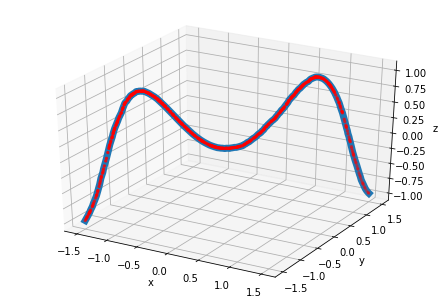

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# funzione usata per fit è  f(x,y) = sin(x^2+y^2)
np.random.seed(0)
x_train = np.random.uniform(-1.5, 1.5, 5000)
x_valid = np.random.uniform(-1.5, 1.5, 500)
y_train = np.random.uniform(-1.5, 1.5, 5000)
y_valid = np.random.uniform(-1.5, 1.5, 500)
x_valid.sort()
y_valid.sort()
f_target = np.sin(pow(x_valid,2)+pow(y_valid,2)) # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
f_train = np.random.normal(np.sin(pow(x_train,2)+pow(y_train,2)) , sigma) # actual measures from which we want to guess regression parameters
f_valid = np.random.normal(np.sin(pow(x_valid,2)+pow(y_valid,2)) , sigma)

# plot training and target dataset
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(x_valid,y_valid,f_target,linewidth=7)
ax.scatter(x_valid,y_valid,f_valid,color='r', marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()



In [9]:
model=tf.keras.Sequential()
model.add(Dense(4, input_shape=(2,)))
model.add(Dense(400,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='elu'))
model.add(Dense(1))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 400)               2000      
_________________________________________________________________
dropout (Dropout)            (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                12030     
_________________________________________________________________
dense_3 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 14,683
Trainable params: 14,683
Non-trainable params: 0
____________________________________________________

In [15]:
# fit the model using training dataset
# over 60 epochs of 32 batch size each
# report training progress against validation 
history = model.fit(x=x_train, y=y_train,
          batch_size=32, epochs=60,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/60


ValueError: in user code:

    /home/chicca/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    /home/chicca/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/chicca/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/chicca/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/chicca/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:531 train_step  **
        y_pred = self(x, training=True)
    /home/chicca/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:886 __call__
        self.name)
    /home/chicca/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 2 but received input with shape [None, 1]
